<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/subClassingKerasModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/subClassingKerasModel.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 16th Jan, 2021
# Myfolder: harnalashok/keras/  @github
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 313
# https://www.tensorflow.org/guide/keras/custom_layers_and_models
#
# Subclassing keras 'Model' class to create Dynamic models
# Two examples

In [ ]:
# 1.0 Call libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 1.1
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# 1.2 Fetch data
housing = fetch_california_housing()

In [ ]:
# 2.0 Little preprocessing
X = housing.data
y = housing.target
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# 2.1 Split data
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(4128, 8)

In [ ]:
# 3.0 Example 1 
#     Subclass Model class to build a simple NN architecture

class Simple(Model):
  def __init__(self, size=30, activation= 'relu'):
    super(Simple, self).__init__()
    # Write your layers here but do not connect them
    # Input layer
    self.dense1 = layers.Dense(size,activation = activation)
    self.dense2 = layers.Dense(size,activation = activation)
    self.dropout = layers.Dropout(0.5)
    self.dense3 = layers.Dense(1,activation = 'sigmoid')

  # Connect your layers here: Forwardpass 
  # Some layers, in particular the BatchNormalization layer
  # and the Dropout layer, have different behaviors during 
  # training and inference. For such layers, it is standard
  # practice to expose a training (boolean) argument in the 
  # call() method.
  # By exposing this argument in call(), you enable the
  # built-in training and evaluation loops (e.g. fit()) 
  # to correctly use the layer in training and inference 

  def call(self, inputs, training = False):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    if training:
      x = self.dropout(x)
    return x

In [ ]:
# 3.1 Instantiate our 'Simple' Model subclass
wd = Simple(40,'relu')

In [ ]:
# 3.2 Create Input object and call
#      the instantiated Simple object

inputs = layers.Input(shape = X_train.shape[1:])
x = wd(inputs, True)  # Get the output layer

# 3.3 Create the Model object now
model = Model(inputs = inputs, outputs = x)

In [ ]:
# 3.3 Note that WideDeep is treated as a layer
#     And summary does not provide details within
#     Simple model
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
simple_1 (Simple)            (None, 1)                 2041      
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 3.4 Compile the model now
model.compile(loss = "mse", metrics= "mse")

In [ ]:
# 3.5 Train the model
model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
516/516 [==============================] - 1s 966us/step - loss: 3.4394 - mse: 3.4394
Epoch 2/30
516/516 [==============================] - 0s 951us/step - loss: 3.2937 - mse: 3.2937
Epoch 3/30
516/516 [==============================] - 1s 973us/step - loss: 3.3426 - mse: 3.3426
Epoch 4/30
516/516 [==============================] - 1s 1ms/step - loss: 3.3314 - mse: 3.3314
Epoch 5/30
516/516 [==============================] - 0s 966us/step - loss: 3.2681 - mse: 3.2681
Epoch 6/30
516/516 [==============================] - 1s 1ms/step - loss: 3.2690 - mse: 3.2690
Epoch 7/30
516/516 [==============================] - 1s 994us/step - loss: 3.3432 - mse: 3.3432
Epoch 8/30
516/516 [==============================] - 1s 1ms/step - loss: 3.3299 - mse: 3.3299
Epoch 9/30
516/516 [==============================] - 1s 981us/step - loss: 3.3951 - mse: 3.3951
Epoch 10/30
516/516 [==============================] - 1s 986us/step - loss: 3.3215 - mse: 3.3215
Epoch 11/30
516/516 [==============

In [ ]:
# 3.6 Evaluate the model
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 917us/step - loss: 3.3195 - mse: 3.3195


[3.3195407390594482, 3.3195407390594482]

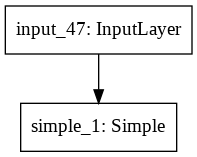

In [ ]:
# 4.0 Plot the model 
#     Note that we do not get model details
#     They are hidden within the Model
plot_model(model)

# Wide and Deep with two inputs

In [ ]:
# 5.0 Create a subclass of Model

class DeepWide(Model):
  def __init__(self,units,activation):
    # 5.1 Initialise super class that is Model class
    super(DeepWide,self).__init__()
    # 5.2 Create layers of our model
    #     But concatenation is not performed here
    self.hidden1 = layers.Dense(units=units, activation=activation)
    self.hidden2 = layers.Dense(units=units, activation=activation)
    self.out = layers.Dense(1,activation = 'sigmoid')

  # call() method can have just two arguments besides, self.
  # One is 'inputs' and the other 'training'. 
  # 5.3 
  def call(self,inputs):
    # 5.3.1 Extract inputs
    input_a = inputs[0]
    input_b = inputs[1]
    # 5.3.2 Make forwardpass
    x = self.hidden1(input_a)
    x = self.hidden2(x)
    # 5.3.3 Concatenate outputs
    concat = tf.keras.layers.concatenate([x,input_b])
    return self.out(concat)

In [ ]:
# 6 Get two inputs
input_a = tf.keras.layers.Input(shape = X_train[:,:8].shape[1:])
input_b = tf.keras.layers.Input(shape = X_train[:,:4].shape[1:])

In [ ]:
# 6.1 Instantiate DeepWide class
#     It takes two inputs
out = DeepWide(30,'relu')

In [ ]:
# 6.2 Get the output of last layer
out = out((input_a,input_b))


In [ ]:
# 7.0 Create model now
model= Model(inputs = [input_a,input_b], outputs = [out])

In [ ]:
# 7.1
model.compile(loss= "mse", metrics = "mse")

In [ ]:
# 7.1 Fit the model
model.fit([X_train[:,:8], X_train[:,:4]], y_train,epochs = 30)

Epoch 1/30
516/516 [==============================] - 1s 973us/step - loss: 2.7520 - mse: 2.7520
Epoch 2/30
516/516 [==============================] - 1s 1ms/step - loss: 2.5042 - mse: 2.5042
Epoch 3/30
516/516 [==============================] - 1s 1ms/step - loss: 2.5134 - mse: 2.5134
Epoch 4/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4383 - mse: 2.4383
Epoch 5/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4237 - mse: 2.4237
Epoch 6/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4655 - mse: 2.4655
Epoch 7/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4858 - mse: 2.4858
Epoch 8/30
516/516 [==============================] - 1s 1ms/step - loss: 2.5144 - mse: 2.5144
Epoch 9/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4986 - mse: 2.4986
Epoch 10/30
516/516 [==============================] - 1s 1ms/step - loss: 2.4755 - mse: 2.4755
Epoch 11/30
516/516 [==========================

In [ ]:
# 7.2 Evaluate the model 
model.evaluate([X_test[:,:8], X_test[:,:4]], y_test)

129/129 [==============================] - 0s 864us/step - loss: 2.4430 - mse: 2.4430


[2.4429500102996826, 2.4429500102996826]

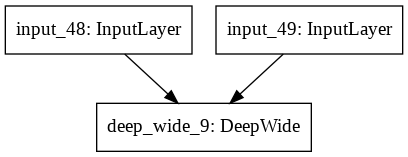

In [ ]:
# 8.0 Plot the model
plot_model(model)

In [ ]:
########## I am done #############